In [45]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [5]:
# Map measurments class
Measurements = Base.classes.measurements

In [6]:
# Map stations class
Stations = Base.classes.stations

In [7]:
# create a session
session = Session(engine)

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [9]:

# Get a list of column names and types: measurments table
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date INTEGER
prcp INTEGER
tobs INTEGER


In [10]:
# Get a list of column names and types:stations table
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude INTEGER
longitude INTEGER
elevation INTEGER


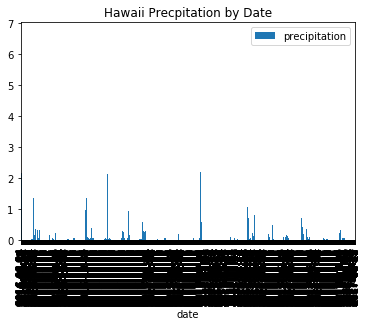

In [37]:
#Design a query to retrieve the last 12 months of precipitation data.
#Select only the date and prcp values.
date_prcp=session.query(Measurements.date,Measurements.prcp).\
    filter(Measurements.date > '2016-08-23').\
    order_by(Measurements.date).all()
    
len(date_prcp)

# Load the results into a pandas dataframe. Set the index to  date column
### BEGIN SOLUTION
date_prcp_df = pd.DataFrame(date_prcp[:6045], columns=['date', 'precipitation'])
date_prcp_df.set_index('date', inplace=True, )


date_prcp_df.head()

#date_prcp_df.iloc[::-1].plot.bar(title="Hawaii Precpitation by Date")
#plt.tight_layout()
#, figsize=(20,3)
date_prcp_df.plot(kind="bar")

# Set a title for the chart
plt.title("Hawaii Precpitation by Date")
plt.show()

In [33]:
date_prcp_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


In [ ]:
# Unpack the `date` and `prcp` from results and save into separate lists
dates =[]
prcps = []

for row in date_prcp:
    date = row[0]
    #print(date)
    dates.append(date)
    
    prcp = row[1]
    #print(prcp)
    prcps.append(prcp)

#print(dates)
#print(prcps)

In [58]:
#Station Analysis

#Design a query to calculate the total number of stations.
num_stations = session.query(Stations.station).count()
num_stations
#There are 9 stations



#Design a query to find the most active stations.
active_stations=session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(Measurements.station.desc()).all() 

#List the stations and observation counts in descending order
active_stations

#Which station has the highest number of observations?
#station USC00519281 has the highest number of observations

#Design a query to retrieve the last 12 months of temperature observation data (tobs)
#Filter by the station with the highest number of observations.
temp_obs=session.query(Measurements.date,Measurements.tobs).\
    filter(Measurements.date > '2016-08-23').\
    filter(Measurements.station == "USC00519281").\
    order_by(Measurements.date).all()
   
#Plot the results as a histogram with bins=12.

#joinging stations and measurments data
stations_join = session.query(Measurements.station, Measurements.date).filter(Measurements.station == Stations.station).all()

stations_join


temp_obs


[('2016-08-24', 77),
 ('2016-08-24', 77),
 ('2016-08-24', 77),
 ('2016-08-25', 80),
 ('2016-08-25', 80),
 ('2016-08-25', 80),
 ('2016-08-26', 80),
 ('2016-08-26', 80),
 ('2016-08-26', 80),
 ('2016-08-27', 75),
 ('2016-08-27', 75),
 ('2016-08-27', 75),
 ('2016-08-28', 73),
 ('2016-08-28', 73),
 ('2016-08-28', 73),
 ('2016-08-29', 78),
 ('2016-08-29', 78),
 ('2016-08-29', 78),
 ('2016-08-30', 77),
 ('2016-08-30', 77),
 ('2016-08-30', 77),
 ('2016-08-31', 78),
 ('2016-08-31', 78),
 ('2016-08-31', 78),
 ('2016-09-01', 80),
 ('2016-09-01', 80),
 ('2016-09-01', 80),
 ('2016-09-02', 80),
 ('2016-09-02', 80),
 ('2016-09-02', 80),
 ('2016-09-03', 78),
 ('2016-09-03', 78),
 ('2016-09-03', 78),
 ('2016-09-04', 78),
 ('2016-09-04', 78),
 ('2016-09-04', 78),
 ('2016-09-05', 78),
 ('2016-09-05', 78),
 ('2016-09-05', 78),
 ('2016-09-06', 73),
 ('2016-09-06', 73),
 ('2016-09-06', 73),
 ('2016-09-07', 74),
 ('2016-09-07', 74),
 ('2016-09-07', 74),
 ('2016-09-08', 80),
 ('2016-09-08', 80),
 ('2016-09-08

In [42]:
station_counts=session.query(stations_join.station).count()
station_counts

AttributeError: 'list' object has no attribute 'station'

In [47]:
test=(
    session.query(Stations, func.count(Stations.station))
    .select_from(Measurements)
    .join(Measurements.station)
    .group_by(station)
)

AttributeError: mapper

In [ ]:
SELECT f.title, COUNT(fa.actor_id) as number_actors 
FROM film as f 
INNER JOIN film_actor as fa on 
f.film_id = fa.film_id
GROUP BY f.film_id;

In [ ]:
join_obj = user_t.join(email_t,
           email_t.c.name == user_t.c.l_name)